In [ ]:
#Main file for the merge-by-references approach. Includes:
# Extracting references by title/date/url
# Grouping timelines with references to other timelines

In [3]:
import json
import re
import matplotlib.dates as mdates
#https://github.com/JMendes1995/py_heideltime
from py_heideltime import py_heideltime
from dateutil import parser

with open('2-3-testset.json') as json_file:
    data = json.load(json_file)
print(len(data))

3


In [4]:
#print(data['histories']['009fd1d9-dc31-4086-8132-18c568b0db61']['content'])

# Load the data so we can find all the doc titles
import pickle

#Load the knowledge base
path = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/"
with open(path + "meetingsInformation.txt", "rb") as fp:   
    meetingsInformation = pickle.load(fp)
with open(path + "itemsInformation.txt", "rb") as fp:   
    itemsInformation = pickle.load(fp)
with open(path + "entriesInformation.txt", "rb") as fp:   
    entriesInformation = pickle.load(fp)

with open(path + "documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)    
with open(path + "listdocumentsInformation.txt", "rb") as fp:   
    listdocumentsInformation = pickle.load(fp)
with open(path + "meetdocumentsInformation.txt", "rb") as fp:   
    meetdocumentsInformation = pickle.load(fp)
    
    
displaynames = []
displayids = []
displaytypes = []

def norm(s):
    return s.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace('.pdf',"").replace('.docx', '').replace('.doc', '').strip().lower()

for d in documentsInformation:
    #print(documentsInformation[d])
    displaynames.append(norm(documentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('documentsInformation')
    
for d in listdocumentsInformation:
    displaynames.append(norm(listdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('listdocumentsInformation')
    
for d in meetdocumentsInformation:
    displaynames.append(norm(meetdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('meetdocumentsInformation')
    

In [14]:
# Now extract text

#example from stackoverflow
#https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python

import io

from copy import deepcopy
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


extractedtitles = [] # list of all titles
fulldates = [] #  list of all dates

docdates = {} # dict of docid-> dates

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    ibabs_urls = []
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)


    fp.close()
    device.close()
    text = retstr.getvalue()
    retstr.close()
    
    reg1 = "'[^']+'"
    reg2 = '"[^"]+"'
    reg3 = '“[^“]+"'
    reg4 = "`[^`]+'"
    reg5 = '‘[^’]+’'

    matches = []
    matches.extend(re.findall(reg1, text))
    matches.extend(re.findall(reg2, text))
    matches.extend(re.findall(reg3, text))
    matches.extend(re.findall(reg4, text))
    matches.extend(re.findall(reg5, text))
    
    results = py_heideltime(text, language='Dutch')
    fulldates.extend([results[0]])
    
    docdates[path] = deepcopy(results)#py_heideltime(text, language='Dutch')
    
    matches = [m.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace("’","").replace("‘","").strip().lower() for m in matches if len(m) < 100]
    extractedtitles.extend(matches)
    print(matches)
#    print(re.findall("/"([^"\\]*(\\.[^"\\]*)*)"|\'([^\'\\]*(\\.[^\'\\]*)*)\'/", text)
#“
    
    return text

"""
lets compute for just besluithistorie (paper)
print('brieven')
for brief in data['brieven']:
    data['brieven'][brief]['content'] = convert_pdf_to_txt('./brieven/' + str(brief) + '.pdf')
    print(brief)
    
if '' in data['memos']:
    data['memos'].pop('')
        
print()
print('memos')
for memo in data['memos']:
    data['memos'][memo]['content'] = convert_pdf_to_txt('./memos/' + str(memo) + '.pdf')
    print(memo)
    
"""
        
print()
print('historie')
for h in data['histories']:
    if h != '':
        data['histories'][h]['content'] = convert_pdf_to_txt('./besluitdocs/' + str(h) + '.pdf')
        print(h)


historie
[]
009fd1d9-dc31-4086-8132-18c568b0db61
[]
03efecf7-9303-44c4-afd9-135a191c796d
['pasjes ondergrondse vuilcontainers weg']
0454d040-0cc2-46a9-9edd-d1a8b652a59a
[]
06a12533-91b2-490f-aa93-04add0fd7c34
[]
09ab9fe9-e513-4bfa-98c0-c317540856c2
['oneigenlijke']
0ac3d7d8-c7b7-4a6a-806e-0470af7bf8bf
['financiele paragraaf gebiedsvisie zuilense vecht — onderdeel gemeente utrecht']
19197683-24f0-4dcb-bd9d-52d09e2f45e6
[]
1bf35fe9-9cc5-4af5-8fc4-6fc287db2bdc
['integraal veiligheidsplan utrecht 2019-2022']
1c0381ab-4939-4a52-98fd-558198f916ae
[]
1d270fbb-4454-48c2-b22c-d0141efe8e01


In [6]:
#initial test to reference by title, check full display name

#versie 1 : kijk of displaynames in documenten voorkomen
# resultaat: bijna niets nuttigs - bijna lalleen undescriptive titles die voorkomen in documenten (e.g. voorstel)

for d in displaynames:
    for brief in data['brieven']:
        if norm(d) in data['brieven'][brief]['content']:
            print(d)
      
print()
for d in displaynames:
    for brief in data['memos']:
        if norm(d) in data['memos'][brief]['content']:
            print(d)
            
print()
for d in displaynames:
    for brief in data['histories']:
        if norm(d) in data['histories'][brief]['content']:
            print(d)

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
programma
programma
programma
zienswijze
communicatieplan
lis
lis
lis
lis
lis
lis
lis
lis
lis
lis

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
programma
aanpak jeugdgroepen

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
het bestemmingsplan
het bestemmingsplan
programma
programma
programma
motie 92
voorbeelden
agenda
agenda
agenda
agenda
agenda
agenda
agenda
ag

In [7]:
#second test: check quoted titles against full title names, and find substrings

#aanpak 2: kijk naar gequotte titels in de documenten (e.g. `Aantrekkelijke Afvalabkken') en kijk daarna of dit voor komt in documenten
# resultaat: erg positief

uniques = 0

#lets see if our quoted titles are found in the list
for et in extractedtitles:
    count = 0
    for i, d in enumerate(displaynames):
        if et in d:
            count += 1
            savename = d
    if count == 1:
            uniques += 1
            print(et)
            print(savename)
            print(displaytypes[i])
            print()


print('extracted titles')
print('true')
print()
print('found')
print(len(extractedtitles))
print('found 1 match')
print(uniques)
            

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

integraal veiligheidsplan utrecht 2019-2022
info en bijdragen meepraters vaststelling integraal veiligheidsplan utrecht 2019-2022 web
meetdocumentsInformation

extracted titles
true

found
33
found 1 match
5


In [18]:
for d in displaynames:
    if 'zorgvuldige uitvoering' in d:
        print(d)

m61 extra regels vragen zorgvuldige uitvoering


In [15]:
#test how many references found

s = 0
s2 = 0

titles = 0
times = 0
titles2 = 0
times2 = 0

for h in data['histories']:
    s2 += data['histories'][h]['urls']
    titles2 += data['histories'][h]['titles']
    times2 += len(data['histories'][h]['date_list'])
    times2 += len(data['histories'][h]['date_meeting'])
    s += data['histories'][h]['urls']
    titles += data['histories'][h]['titles']
    times += len(data['histories'][h]['date_list'])
    times += len(data['histories'][h]['date_meeting'])
    
for b in data['brieven']:
    s += data['brieven'][b]['urls']
    titles += data['brieven'][b]['titles']
    times += len(data['brieven'][b]['date_list'])
    times += len(data['brieven'][b]['date_meeting'])

for m in data['memos']:
    s += data['memos'][m]['urls']
    titles += data['memos'][m]['titles']
    times += len(data['memos'][m]['date_list'])
    times += len(data['memos'][m]['date_meeting'])
    
print('URLs total')
print(s)
print(s / 30)

print(s2)


s = 0
s2 = 0
dts2 = 0
for h in data['histories']:
    s += len(set(data['histories'][h]['url']))
    s2 += len(set(data['histories'][h]['url']))
for b in data['brieven']:
    s += len(set(data['brieven'][b]['url']))
for m in data['memos']:
    s += len(set(data['memos'][m]['url']))

print('URLs found')
print(s)
print(s / 30)
print(s2)



print('titles found')
print(titles)
print(titles2)

print('useful dates')
print(times)
print(times2)

print('found dates')
ds = []
for doc in fulldates:
    ds.extend(set(doc))
print(len(fulldates))


print('total dates')
print()


URLs total
57
1.9
45
URLs found
56
1.8666666666666667
37
titles found
14
6
useful dates
69
46
found dates
10
total dates



    * kan je disambigueren door te kijken of er een URL of datum in dezelfde zin staat?
        * nee!  conclusie: het is een mogelijk interessante richting, maar we kunnen de precisie nog neit waarborgen
        * mogelijke oplossing: als 'recommended' suggereren ipv 

In [23]:

text = 'dit een test 17 januari 2013'
results = py_heideltime(text, language='Dutch')

print(results[0])
#"news" (news-style documents); "narrative" (narrative-style documents (e.g., Wikipedia articles)); "colloquial" (English colloquial (e.g., Tweets and SMS)); "scientific" 

[('2013-01-17', '17 januari 2013')]


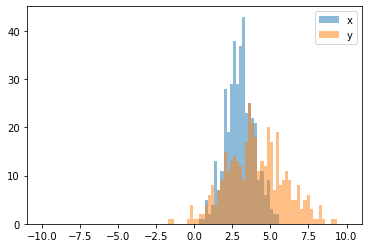

In [24]:
#histogram library test

import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [16]:
#collect different timestamps in documents

briefdates = []
briefuploads = []

historiedates = []
historieuploads = []

memodates = []
memouploads = []

def getDate(dates, d, curdate):
    newdates = []
    for d in dates[d][0]:
        date = d[0]
        if 'PRESENT_REF' in date:
            date = str(curdate)
        if not 'H' in date and not 'P' in date and not 'FUTURE_REF' in date and not 'X' in date:
            if len(date) == 4:
                date += '-01-01'
            date = date.replace('us','').replace('0016', '2016').replace('Q1', '02-01').replace('Q2', '05-01').replace('Q3', '08-01').replace('Q4', '11-01').replace('SU', '08-01')
            if date > '2000-01-01':
                newdates.append(parser.parse(date))
    return newdates


for d in docdates:
    did = d.split('/')[-1].split('.pdf')[0]
    
    print(d)
    print(len(docdates[d][0]))
    
    if 'brieven' in d:
        print(docdates[d][0])
        
        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])
        briefdates.append(getDate(docdates, d, curdate))

        print(entriesInformation[did]['Ontvangstdatum'])
        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))
        
    if 'memo' in d:
        print(docdates[d][0])
        print(entriesInformation[did]['Datum invoer'])
        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))

        curdate = parser.parse(entriesInformation[did]['Datum invoer'])
        memodates.append(getDate(docdates, d, curdate))

#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])
        
    if 'besluitdocs' in d:
        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate'])
        historieuploads.append(parser.parse(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']))

        curdate = meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']
        historiedates.append(getDate(docdates, d, curdate))
    
    print()

./besluitdocs/009fd1d9-dc31-4086-8132-18c568b0db61.pdf
49
2019-11-21T14:00:00

./besluitdocs/03efecf7-9303-44c4-afd9-135a191c796d.pdf
1
2020-01-30T09:30:00

./besluitdocs/0454d040-0cc2-46a9-9edd-d1a8b652a59a.pdf
4
2019-12-19T09:30:00

./besluitdocs/06a12533-91b2-490f-aa93-04add0fd7c34.pdf
4
2019-07-18T10:00:00

./besluitdocs/09ab9fe9-e513-4bfa-98c0-c317540856c2.pdf
8
2019-05-28T09:30:00

./besluitdocs/0ac3d7d8-c7b7-4a6a-806e-0470af7bf8bf.pdf
6
2019-10-17T09:30:00

./besluitdocs/19197683-24f0-4dcb-bd9d-52d09e2f45e6.pdf
10
2020-01-23T19:30:00

./besluitdocs/1bf35fe9-9cc5-4af5-8fc4-6fc287db2bdc.pdf
5
2018-09-06T14:00:00

./besluitdocs/1c0381ab-4939-4a52-98fd-558198f916ae.pdf
16
2020-02-20T14:00:00

./besluitdocs/1d270fbb-4454-48c2-b22c-d0141efe8e01.pdf
8
2020-06-18T09:30:00



range(0, 32)
now plotting


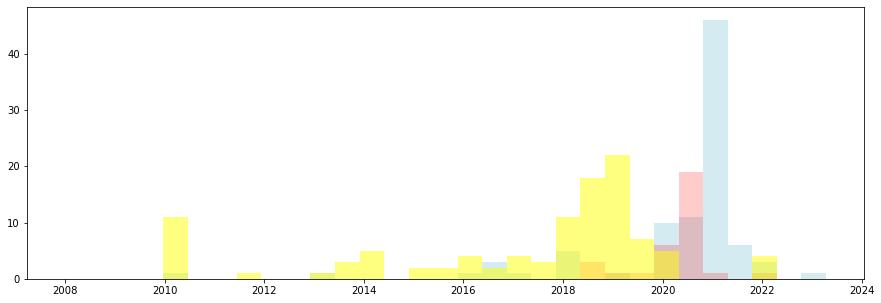

In [21]:
#test TEMPORAL COVERAGE
# i.e. to what time do they refer

#print(len(briefdates[0]))
#print(len(briefuploads))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import date2num

s = 2008
e = 2024

#set universal bin width
start = datetime.date(s,1,1) 
end = datetime.date(e,1,1) 
d = 6*30

bin_width = datetime.timedelta(days=d)

#print((e - s) * 360)
#print((e - s) * 360 / d)

#print(len(range(0, int(e - (s * 360) / (d)))))
print(range(0, int((e - s) * 360 / d)))
#print(len(range(0, int((float(e)-s) / float(d)))))

week = []
for i in range(0, int((e - s) * 360 / d)):
    week.append(start + (i) * bin_width)

numweek = date2num(week)

    
print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(sum(briefdates, []), bins=numweek, color='lightblue', alpha=0.5)
plt.hist(sum(memodates, []), bins=numweek, color='red', alpha=0.2)
plt.hist(sum(historiedates, []), bins=numweek, color='yellow', alpha=0.5)
plt.show()

[datetime.datetime(2020, 12, 9, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 17, 0, 0), datetime.datetime(2020, 12, 14, 0, 0), datetime.datetime(2020, 12, 17, 0, 0)]

[0, -293, -3995, -293, 0, -343]

range(-4000, 1000, 100)
now plotting


(array([ 0.,  0.,  3.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  4.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  3.,
         1.,  2.,  2.,  4.,  3.,  0.,  2.,  7., 14., 11.,  4.,  8., 12.,
         4.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  0.]),
 array([-4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200,
        -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300,
        -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400,
        -1300, -1200, -1100, -1000,  -900,  -800,  -700,  -600,  -500,
         -400,  -300,  -200,  -100,     0,   100,   200,   300,   400,
          500,   600,   700,   800,   900]),
 <BarContainer object of 49 artists>)

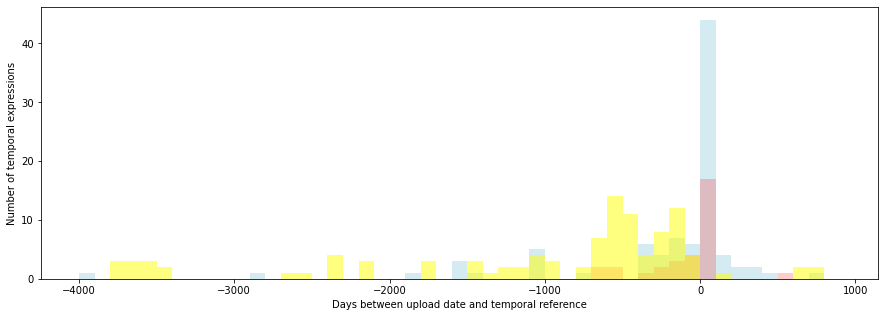

In [31]:
#relative temporal coverage to document upload date

rbriefdates = []
rmemodates = []
rhistoriedates = []

print(briefuploads)

for i, curdate in enumerate(briefuploads):
    rbriefdates.append([(x - curdate).days for x in briefdates[i]])
for i, curdate in enumerate(memouploads):
    rmemodates.append([(x - curdate).days for x in memodates[i]])
for i, curdate in enumerate(historieuploads):
    rhistoriedates.append([(x - curdate).days for x in historiedates[i]])

print()
print(rbriefdates[0])

start = -4000
end = 1000
step = 100

print()
bs = range(start, end, step)
print(bs)

rbriefdates2 = [x for x in rbriefdates if x != 0]
rmemodates2 = [x for x in rmemodates if x != 0]
rhistoriedates2 = [x for x in rhistoriedates if x != 0]

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.ylabel('Number of temporal expressions')
plt.xlabel('Days between upload date and temporal reference')
plt.hist(sum(rbriefdates2, []), bins=bs, color='lightblue', alpha=0.5)
plt.hist(sum(rmemodates2, []), bins=bs, color='red', alpha=0.2)
plt.hist(sum(rhistoriedates2, []), bins=bs, color='yellow', alpha=0.5)


In [24]:
for b in bs:
    print(b)

#!pip3 install python-dateutil

-4000
-3900
-3800
-3700
-3600
-3500
-3400
-3300
-3200
-3100
-3000
-2900
-2800
-2700
-2600
-2500
-2400
-2300
-2200
-2100
-2000
-1900
-1800
-1700
-1600
-1500
-1400
-1300
-1200
-1100
-1000
-900
-800
-700
-600
-500
-400
-300
-200
-100
0
100
200
300
400
500
600
700
800
900


In [5]:
#Next step: plot document re-use instead!

#Store udos3 so we can investigate the dupes more easily (e.g. the temporal nature of document re-use)
with open(path + "uniquedossiers.txt", "rb") as fp:   
    udos = pickle.load(fp)

with open(path + "uniqueses.txt", "rb") as fp:   
    uniqueses = pickle.load(fp)

    
print(len(udos))
print(len(uniqueses))

for d in udos:
    for attr in d:
        print(attr)

3004
6320
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames


entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
492
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
495
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
496
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
499
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entr

timeline
1108
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1109
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1117
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timel

1683
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1684
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1688
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1692
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
1694
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
timeline
filenames
doc_ids
item_ids
entry_ids
origin_ids
origin_types
time

filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
filenames
doc_ids
item_ids
entry_ids
f

In [288]:
#get date of co-cited doc

#dict [id] = [days since id (= 0), days since uniqueses[0], since [1] etc]
datestore = {}

def getDate2(d):
    if d['origin type'] == 'entry':
        if 'Ontvangstdatum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Ontvangstdatum']
        elif 'Datum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum']
        elif 'Datum invoer' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum invoer']
        else:
            print(entriesInformation[d[0]['origin id']])
            anchor
    else: #case item document
        curdate = meetingsInformation[itemsInformation[documentsInformation[d['id']]['origin id']]['origin id']]['meetingdate'] #date of id
    if curdate == None:
        return None
#        print(entriesInformation[d['origin id']])
    return parser.parse(curdate)



for u in uniqueses:
    datestore[u] = [0]
    
    curdate = getDate2(uniqueses[u][0])
    #print(curdate)
    for dupe in uniqueses[u]:
        #print()
#        print(dupe['origin type'])
#        print(getDate2(dupe))
#        print(curdate)
        if getDate2(dupe) != None and curdate != None:
            datestore[u].append((getDate2(dupe) - curdate).days)
            
        #print(datestore[u][-1])
    
    #normalize so most recent date is 0, rest is negative
    m = max(datestore[u])
    datestore[u] = list(([(x - m)  for x in datestore[u]]))  # divide by 365 if you want to plot per year

listofdates = []
for i in datestore:
    print(datestore[i])
    listofdates.extend(datestore[i])
#    print(datestore[u])
#    break

[0, 0, 0, 0, 0, 0, 0, 0]
[-35, -35, -35, -35, -35, 0, -35, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[-28, -28, -28, -28, -28, 0, -28, 0]
[-56, -56, -56, 0, -56, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-112, -112, -112, -112, -112, 0, -112, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-7, -7, 0, -7, 0, -7, 0, -7, 0, -7, 0]
[0, 0, 0, 0, 0

[-18, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175]
[-18, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0]
[-33, -33, -33, -33, -33, -21, -4, 0, -33, -21, -4, 0]
[-29, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-19, -19, -19, -19, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -


range(-1000, 0, 20)
now plotting


(array([0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 7.000e+00, 0.000e+00,
        1.200e+01, 3.100e+01, 2.900e+01, 1.400e+01, 2.000e+01, 1.000e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.700e+01,
        6.000e+00, 5.000e+00, 4.900e+01, 4.700e+01, 1.800e+01, 4.700e+01,
        1.360e+02, 1.240e+02, 1.870e+02, 3.900e+01, 3.300e+01, 3.000e+01,
        7.500e+01, 3.800e+01, 1.270e+02, 2.030e+02, 1.190e+02, 1.840e+02,
        3.170e+02, 3.990e+02, 5.730e+02, 9.550e+02, 1.620e+03, 3.399e+03,
        6.516e+03]),
 array([-1000,  -980,  -960,  -940,  -920,  -900,  -880,  -860,  -840,
         -820,  -800,  -780,  -760,  -740,  -720,  -700,  -680,  -660,
         -640,  -620,  -600,  -580,  -560,  -540,  -520,  -500,  -480,
         -460,  -440,  -420,  -400,  -380,  -360,  -340,  -320,  -300,
         -280,  -260,  -240,  -220,  -200,  -180,  -160,  -140,  -120,
         -100,   -80,   -60,   -

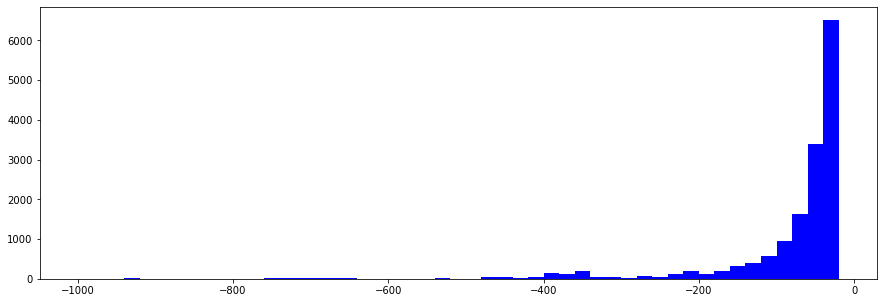

In [292]:
start = -1000
end = 0
step = 20

print()
bs = range(start, end, step)
print(bs)

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(listofdates, bins=bs, color='blue')

In [2]:
# Load the data so we can find all the doc titles
import pickle

#Load the knowledge base
path = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/"
with open(path + "meetingsInformation.txt", "rb") as fp:   
    meetingsInformation = pickle.load(fp)
with open(path + "itemsInformation.txt", "rb") as fp:   
    itemsInformation = pickle.load(fp)
with open(path + "entriesInformation.txt", "rb") as fp:   
    entriesInformation = pickle.load(fp)

with open(path + "documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)    
with open(path + "listdocumentsInformation.txt", "rb") as fp:   
    listdocumentsInformation = pickle.load(fp)
with open(path + "meetdocumentsInformation.txt", "rb") as fp:   
    meetdocumentsInformation = pickle.load(fp)
    
print(len(documentsInformation))
print(len(listdocumentsInformation))
print(len(meetdocumentsInformation))

29229
22908
2161


In [18]:
# We adapt the previous function for mass parsing

import io
from tqdm import tqdm
from copy import deepcopy
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import json
import os
import PyPDF2


def extract(path):
    #extractedtitles = [] # list of titles
    #fulldates = [] #  list of dates
    #docdates = {} # dict of docid-> dates

    #get urls - I guess we do this using a different pdf parser  (pypdf instead of pdfminer)

    PDFFile = open(path,'rb')
    
    try:
        PDF = PyPDF2.PdfFileReader(PDFFile)
        pages = PDF.getNumPages()
    except (PyPDF2.utils.PdfReadError, NotImplementedError) as e: 
        print("invalid PDF file")
        print(e)
        return ([], [], [], 0)
#    except PyPDF2.utils.PdfReadError
    key = '/Annots'
    uri = '/URI'
    ank = '/A'
    
    
    #if document is too long we don't parse it
    pydates = [[]]
    matches = []
    ibabs_urls = []
    ps = pages
    
    if pages < 20:

        for page in range(pages):
            print("Current Page: {}".format(page))

            pageSliced = PDF.getPage(page)
            pageObject = pageSliced.getObject()
            if key in pageObject.keys():
                ann = pageObject[key]
                for a in ann:
                    u = a.getObject()
                    #if uri in u[ank].keys():
                    if ank in u and uri in u[ank].keys():
                        #SO it is an URL, now filter for ibabs URLs
                        newurl = u[ank][uri]
                        if 'ibabs' in newurl and 'trecht' in newurl:
                            ibabs_urls.append(u[ank][uri])
                            print(u[ank][uri])





        rsrcmgr = PDFResourceManager()
        retstr = io.StringIO()
        codec = 'utf-8'
        laparams = LAParams()
        device = TextConverter(rsrcmgr, retstr, codec = 'utf-8', laparams=laparams)
        fp = open(path, 'rb')
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()



        pages = PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                      caching=caching,
                                      check_extractable=False)
        for page in pages:
            interpreter.process_page(page)



        fp.close()
        device.close()
        text = retstr.getvalue()
        retstr.close()

        reg1 = "'[^']+'"
        reg2 = '"[^"]+"'
        reg3 = '“[^“]+"'
        reg4 = "`[^`]+'"
        reg5 = '‘[^’]+’'

        matches = []

        matches.extend(re.findall(reg1, text))
        matches.extend(re.findall(reg2, text))
        matches.extend(re.findall(reg3, text))
        matches.extend(re.findall(reg4, text))
        matches.extend(re.findall(reg5, text))



        pydates = py_heideltime(text, language='Dutch')


        #fulldates.extend([pydates[0]])

        #docdates[path] = deepcopy(pydates)#py_heideltime(text, language='Dutch')

        matches = [m.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace("’","").replace("‘","").strip().lower() for m in matches if len(m) < 100]
        #extractedtitles.extend(matches)
        #print(matches)
    #    print(re.findall("/"([^"\\]*(\\.[^"\\]*)*)"|\'([^\'\\]*(\\.[^\'\\]*)*)\'/", text)
    #“

        #pydates[0] #dates
        #matches #titles
        #ibabs_urls #urls
    
    return pydates[0], matches, ibabs_urls, ps


# Now extract dates, titles and urls from documents

In [19]:
sofar = '62eb09bd-8361-48ff-9f48-e3033999f793'
found = False
import os

blacklist = ['81fbf658-79a0-4558-9bdb-145902675c01', '8f1f50c5-34ed-41d1-bada-5f26d1d0f49e', 'e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1', 
             'e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1', '85d04dba-11c8-40aa-9e18-f2f680aeb73e', '87452e40-ec68-4d85-a8d6-d2474ce51b43',
            '58802056-227c-4f1e-92d1-43a9703b6e62', 'f7a239c7-0206-4362-9a4c-bc1f62e3e190', '9ebacb4f-879a-4c53-8afc-93196e9b3bb8',
            'a4b11449-142c-42a8-847d-ace360384e22', 'eea2eb2e-a78e-4ceb-b41b-0781318371ae', '96713794-f69c-4aa8-a055-b7c618b486b5',
            'a7c03cff-2c3a-43c8-ac01-95263de6a0eb', 'd3b12991-f814-43b4-9d9d-fcca8fe9b088', '5f6189e7-d21c-40f8-a752-92a1e3de1d1b', 
             '12ec4a70-6fde-489e-9f83-e39cff4c4b04', '56f4bf18-2a34-4313-97be-5324d3123a2e', 'cac86f4c-d88f-4f87-94ed-ea4c4703187a',
            '3559015e-3c3e-40a8-aa70-ce49163af0bf', '46ca53d0-7d6c-48b9-a2ae-7e6982722811', 'd373cea1-29a0-4168-9e00-2fd55745428f',
            '1aa36333-91e1-431a-9edf-ab2b90f4e401', 'b42388a3-82de-4bf8-8579-ec3a3d92412d', 'c9e65da3-67ac-4152-966b-2edcf1075a3d',
            '9767288a-0d2e-4cd3-8c1a-57cdc672b618', '621c441b-6952-48d8-b198-dfea96a3e2e4', '204763c8-ac8b-4c77-8959-1da380e75f55',
            '7a521a0e-e321-46d4-86c7-1faa572c51f5', 'e7775c01-b634-4c20-bf0f-1a413ef0b4e2', 'a68a2ca7-719a-450a-9e56-096ef5c803a3',
            '5a4216ff-cfb3-4f6b-ad41-92d385ea52b3', '9e82edfa-8a90-4459-90d6-4decbaad8996', '4edd43a0-db28-41c7-8465-921d51d962d4',
            '0f8d2925-f4c8-4320-beb1-0fc0c5e12fa9', '31fdc517-c0c6-4d35-b52e-4c007b1a17a9', 'c147841d-6b78-4628-907a-eb83da0c901b',
            'e4d19b04-bfb8-4fce-bafd-2953a88f7b7d', '9c6cb031-6090-4f7f-9299-4a5b5c14638b', 'db39b374-da5e-40a9-b931-4f0887b32918',
            '99264a1b-816f-4325-a7c6-a20694964f47', 'a3ce0f66-42dd-467e-8bd0-18d379788431', 'c4d6dbd1-22cd-42d2-b6e3-a126682602a8',
            'f1891bb1-c8ad-4b97-bd92-807f196820ca', '56ef2760-d041-4f3f-8544-713b94651b92', '63f37007-7c8d-4e0f-8265-d30cc8d5800c',
            'c2159765-d7e2-40e8-8e7e-7e50bae69905']
#didnt manually check
blacklist2 = ['655ff68e-a8f2-41b6-8af8-c8eb4c7e7da4', '6f9c0c71-c9a7-4f20-acdd-b6048a47c648', '7d4421c5-8770-423b-9593-62594d99f3f6',
             'c2159765-d7e2-40e8-8e7e-7e50bae69905', 'bac2006c-f15f-42ca-88d2-fc8fa608d38e', 'adaed734-f3eb-4a3c-a276-da8c5600de4c',
             '467f4cbe-2598-4250-84af-8e7c67920e42', '1997d0dc-23f8-42b0-998d-331e30791d20', 'b3ba43e8-0682-46e8-8fa4-216d5834d6a5',
             '625ca163-b1bd-4ce8-a8a2-e4266a427a39', 'a3fdfedd-4bf7-4799-9d47-007bd486e9b0', 'bcb826cf-c596-469c-b889-4b38783a7630',
             '79011427-7bee-41fa-9ae8-2e8638a1aa3e', '0cc29069-8b80-4ee5-8dd8-b4d4f8c1fcdc', 'f5907461-ceda-4550-bd46-7c2a1755d44a',
             'bee216c8-1dce-46ea-baef-fa925069ff7d', 'cc6e121c-24c9-46a5-bd9a-40af0cf044ee', '62eb09bd-8361-48ff-9f48-e3033999f793']

def extractor(d):
    results = {}
    dates, titles, urls, pages = extract(path + 'documentsInformation/' + d + '.pdf')    
    results[d] = { 'dates':deepcopy(dates), 'titles':deepcopy(titles), 'urls':deepcopy(urls), 'pages':pages }
    return results


loop = 0
i = 0
jsonpath = path + 'extracts'

for d in (documentsInformation):
    if d == sofar:
        found = True
    if found:

    
        i+= 1
        
        if d in blacklist or d in blacklist2 or os.path.getsize(path + 'documentsInformation/' + d + '.pdf') > 3000000 or 'NL.IMRO' in documentsInformation[d]['filename'] or 'Verbeelding BP' in documentsInformation[d]['filename'] or ('erbeelding' in documentsInformation[d]['filename'] and 'ijlage' in documentsInformation[d]['filename']) or 'verbeelding' in documentsInformation[d]['filename'] or 'Verbeelding' in documentsInformation[d]['filename'] or ('NL' in documentsInformation[d]['filename'] and 'IMRO' in documentsInformation[d]['filename']):
            with open(path + 'extractedDocs/' + str(d), 'w') as f:
                json.dump({}, f)
        
        else:
            print(d)
            
            results = extractor(d)

            # you know - lets just write every document for now.        every x items we write down our intermediate results and continue
            #if i < 2000:
            with open(path + 'extractedDocs/' + str(d), 'w') as f:
                    json.dump(results, f)
            #i = 0
            #loop += 1


ed1f4250-dc5c-4da5-a3a6-0d0b66216363
invalid PDF file
File has not been decrypted
6d25ae81-8955-4c9b-8e53-35dd582a375a
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
Current Page: 11
Current Page: 12
Current Page: 13
Current Page: 14
Current Page: 15
5336358e-74f2-44ef-8133-94e739ea14ed
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b3a6060c-ea03-4a77-9d11-37b1dbf21d6b
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dd0f1dc0-4e84-4404-9d6f-5a02ab300fb0
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10
01061d70-80c7-473f-93ac-a49889c9b514
Current Page: 0
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/b3a6060c-ea03-4a77-9d11-37b1dbf21d6b
Current Page: 1
https://ris2.ibabs.eu/Reports/ViewListEntry/Utrecht/dd0f1dc0-4e84-440

ab58edda-3f53-408a-9260-17c0c48d86fd
Current Page: 0
5f6f099c-2fea-43ab-ad08-046986940d73
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
967af2ac-55a6-4264-ac2b-a4d612094123
Current Page: 0
34495222-8275-4cc5-a318-fa786ec25b07
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
45e2731b-b995-4b0a-8af4-8d10892f05c7
bb58d8ed-add2-4a16-8655-62e488d11ca8
Current Page: 0
Current Page: 1
Current Page: 2
Current Page: 3
Current Page: 4
Current Page: 5
Current Page: 6
Current Page: 7
Current Page: 8
Current Page: 9
Current Page: 10


KeyboardInterrupt: 

In [20]:
for i in blacklist:
    print(i)
    print(documentsInformation[i]['filename'])

81fbf658-79a0-4558-9bdb-145902675c01
Bijlage 18 GRP 2007-2010 v19-01-07 Maatregelen basisinspanning.pdf
8f1f50c5-34ed-41d1-bada-5f26d1d0f49e
Bijlage 8 NL.IMRO.0344.pdf
e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1
Bijlage 9 NL.IMRO.0344.pdf
e8dbf201-cf6c-4fdd-b5e8-10864b05f8a1
Bijlage 9 NL.IMRO.0344.pdf
85d04dba-11c8-40aa-9e18-f2f680aeb73e
Bijlage 10 NL.IMRO.0344.pdf
87452e40-ec68-4d85-a8d6-d2474ce51b43
Bijlage 5 Blad 3 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
58802056-227c-4f1e-92d1-43a9703b6e62
Bijlage 6 Blad 4 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
f7a239c7-0206-4362-9a4c-bc1f62e3e190
Bijlage 7 Blad 5 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
9ebacb4f-879a-4c53-8afc-93196e9b3bb8
Bijlage 9 Blad 7 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
a4b11449-142c-42a8-847d-ace360384e22
Bijlage 10 Blad 8 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
eea2eb2e-a78e-4ceb-b41b-0781318371ae
Bijlage 11 Blad 9 Verbeelding BP Overvecht-Noordelijke Stadsrand.pdf
9671379

In [6]:
# LETS CALCULATE TEMPORAL COVERAGE WITH FULL ITEM DOCS
# First,  

briefdates = []
briefuploads = []

historiedates = []
historieuploads = []

memodates = []
memouploads = []

def getDate(dates, d, curdate):
    newdates = []
    for d in dates[d][0]:
        date = d[0]
        if 'PRESENT_REF' in date:
            date = str(curdate)
        if not 'H' in date and not 'P' in date and not 'FUTURE_REF' in date and not 'X' in date:
            if len(date) == 4:
                date += '-01-01'
            date = date.replace('us','').replace('0016', '2016').replace('Q1', '02-01').replace('Q2', '05-01').replace('Q3', '08-01').replace('Q4', '11-01').replace('SU', '08-01')
            
            #WHY DID WE IGNORE BEFORE 2k
            #if date > '2000-01-01':
            newdates.append(parser.parse(date))
    return newdates

#Lets start reading docs

#get filenames
extracts_dir = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/extractedDocs/"
extracts = [s for s in os.listdir(extracts_dir)]

relativedates = []




from dateutil import parser
import datetime

#function that checks if we have missing values - because dateutil uses a default date to replace
def date_checker(date_input):
    out_dict = [False,False,False]
    out_check_a = parser.parse(date_input,default=datetime.datetime(2020, 1, 1))
    out_check_b = parser.parse(date_input, default=datetime.datetime(2021, 12, 31))
    if(out_check_a.year==out_check_b.year):
        out_dict[0] = out_check_a.year
    if (out_check_a.month == out_check_b.month):
        out_dict[1] = out_check_a.month
    if (out_check_a.day == out_check_b.day):
        out_dict[2] = out_check_a.day
    return out_dict

#normalize to a standard datetime format
def norm(s):
    s2 = str(s)
    
    try:
        #making str explicit seems to have worked - later prints dont trigger anymore
        s = parser.parse(str(s))
        
        #check if the string has missing date elements
        check = date_checker(str(s2))
        #print('checking')
        #print(check)
        if False in check:
            s = False
    
    except:
        s = False

        
    return s





for extract in extracts:
    with open(extracts_dir + extract) as json_file:
        data = json.load(json_file)
        
        #normalize uploaddate (only use specific dates)
                
        uploaddate = norm(meetingsInformation[itemsInformation[documentsInformation[extract]['origin id']]['origin id']]['meetingdate'])
        if uploaddate:
            #if the document had succesful extraction
            if extract in data:
                for d in data[extract]['dates']:
                    #normalize date
#                    print(d)
                    d2 = norm(d[0])
                    if d2:
                        #print(d2)
                        #print(uploaddate)
                        #print(d2 - uploaddate)
                        relativedates.append(d2 - uploaddate)

        else:
            print('No meetingdate')

"""
for d in docdates:
    did = d.split('/')[-1].split('.pdf')[0]
    
    print(d)
    print(len(docdates[d][0]))
    
    if 'brieven' in d:
        print(docdates[d][0])
        
        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])
        briefdates.append(getDate(docdates, d, curdate))

        print(entriesInformation[did]['Ontvangstdatum'])
        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))
        
    if 'memo' in d:
        print(docdates[d][0])
        print(entriesInformation[did]['Datum invoer'])
        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))

        curdate = parser.parse(entriesInformation[did]['Datum invoer'])
        memodates.append(getDate(docdates, d, curdate))

#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])
        
    if 'besluitdocs' in d:
        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate'])
        historieuploads.append(parser.parse(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']))

        curdate = meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']
        historiedates.append(getDate(docdates, d, curdate))
    
    print()
    
    
"""

"\nfor d in docdates:\n    did = d.split('/')[-1].split('.pdf')[0]\n    \n    print(d)\n    print(len(docdates[d][0]))\n    \n    if 'brieven' in d:\n        print(docdates[d][0])\n        \n        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])\n        briefdates.append(getDate(docdates, d, curdate))\n\n        print(entriesInformation[did]['Ontvangstdatum'])\n        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))\n        \n    if 'memo' in d:\n        print(docdates[d][0])\n        print(entriesInformation[did]['Datum invoer'])\n        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))\n\n        curdate = parser.parse(entriesInformation[did]['Datum invoer'])\n        memodates.append(getDate(docdates, d, curdate))\n\n#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])\n        \n    if 'besluitdocs' in d:\n        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin

range(0, 32)
-203
115
now plotting


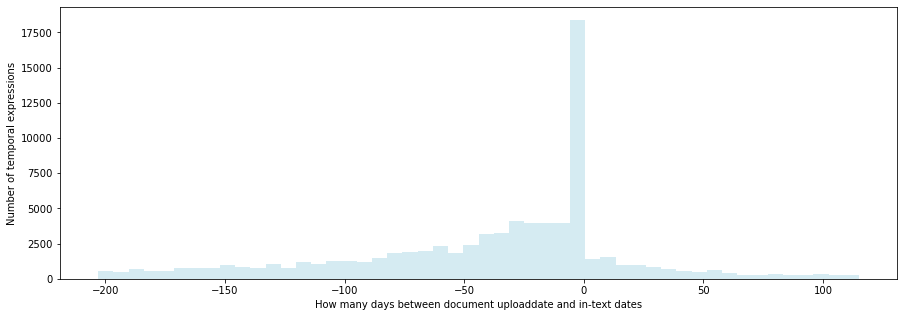

done


In [30]:
#Now, plot temporal coverage on larger doucment set

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import date2num

s = 2008
e = 2024

#set universal bin width
start = datetime.date(s,1,1)
end = datetime.date(e,1,1)
d = 6*30

bin_width = datetime.timedelta(days=d)

#print((e - s) * 360)
#print((e - s) * 360 / d)

#print(len(range(0, int(e - (s * 360) / (d)))))
print(range(0, int((e - s) * 360 / d)))
#print(len(range(0, int((float(e)-s) / float(d)))))

week = []
for i in range(0, int((e - s) * 360 / d)):
    week.append(start + (i) * bin_width)

numweek = date2num(week)


def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

relativedates_int = [x.days for x in relativedates if x.days != 0]
relativedates_int = reject_outliers(np.array(relativedates_int))


print(min(relativedates_int))
print(max(relativedates_int))


print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(relativedates_int, bins=50, color='lightblue', alpha=0.5)
plt.xlabel('How many days between document uploaddate and in-text dates')
plt.ylabel('Number of temporal expressions')
#plt.hist(sum(memodates, []), bins=numweek, color='red', alpha=0.2)
#plt.hist(sum(historiedates, []), bins=numweek, color='yellow', alpha=0.5)
plt.show()
print('done')

In [28]:
print(memodates)

[]


25
now plotting


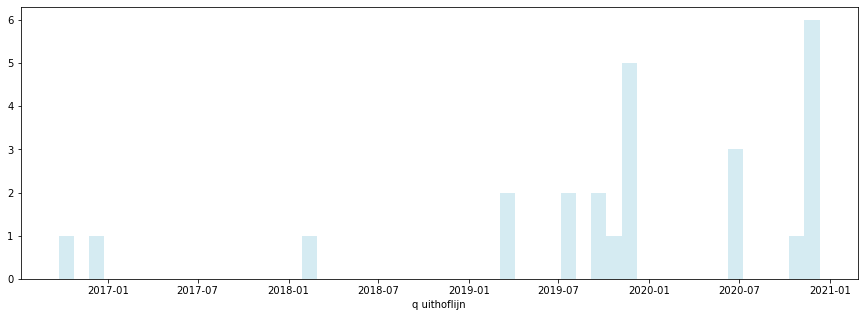

now plotting


ValueError: The 'color' keyword argument must have one color per dataset, but 49 datasets and 1 colors were provided

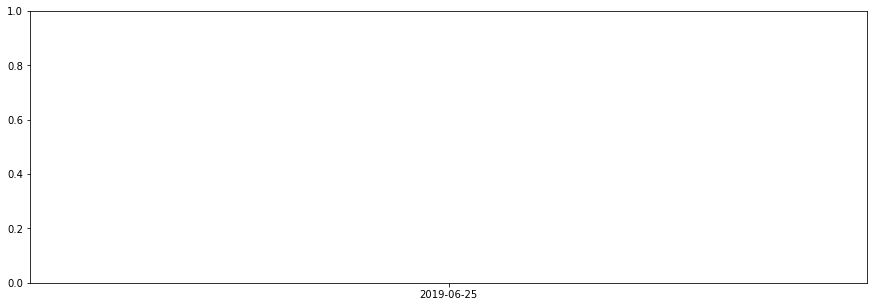

In [50]:
#lets try mapping time for a dossier

def getDate3(did):
    d = ''
    if did in entriesInformation:
        d = entriesInformation[d]
    elif did in documentsInformation:
        d = documentsInformation[did]
    elif did in listdocumentsInformation:
        d = listdocumentsInformation[did]
    else:
        print(did)
        error
    
    
    
    if d['origin type'] == 'entry':
        if 'Ontvangstdatum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Ontvangstdatum']
        elif 'Datum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum']
        elif 'Datum invoer' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum invoer']
        else:
            print(entriesInformation[d[0]['origin id']])
            anchor
    else: #case item document
        curdate = meetingsInformation[itemsInformation[documentsInformation[d['document id']]['origin id']]['origin id']]['meetingdate'] #date of id
    if curdate == None:
        return None
#        print(entriesInformation[d['origin id']])
    return parser.parse(curdate)

uithofnames = []
uithofids = []
uithoftypes = []

uithofdates = []

for i, d in enumerate(displaynames):
    if 'samen stad maken' in d.lower():
        uithofnames.append(displaynames[i])
        uithofids.append(displayids[i])
        uithoftypes.append(displaytypes[i])
        
        uithofdates.append(getDate3(displayids[i]))
        
        if 'historie' in d.lower():
            print(d)
            print(displayids[i])
        
print(len(uithofnames))

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(uithofdates, bins=50, color='lightblue', alpha=0.5)
plt.xlabel('q uithoflijn')
plt.show()

#extract dates from besluithistorie
historyid = '009fd1d9-dc31-4086-8132-18c568b0db61'#'f1933aa3-b72f-4879-be41-48cea4899869'


#with open(extracts_dir + historyid) as json_file:
#    h = json.load(json_file)
    #uploaddate = norm(meetingsInformation[itemsInformation[documentsInformation[historyid]['origin id']]['origin id']]['meetingdate'])
    #for d in h[historyid]['dates']:

    
data['histories'][historyid]
        
print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(h[historyid]['dates'], bins=50, color='lightblue', alpha=0.5)
plt.xlabel('besluithistorie uithoflijn')
plt.show()


    

In [23]:
def printgenre(genre):
    titles = 0
    dates = 0
    ids = 0

    for h in genre:
        dates += len(set(genre[h]['date_list']))
        dates += len(set(genre[h]['date_meeting']))
        titles += len(set(genre[h]['title_list']))
        titles += len(set(genre[h]['title_meeting']))
        ids += len(set(genre[h]['url']))
        
    print('By ID')
    print(ids)
    print('By Date')
    print(dates)
    print('By Title')
    print(titles)

print('histories')
printgenre(data['histories'])
print()
print('letters')
printgenre(data['brieven'])
print()
print('memos')
printgenre(data['memos'])



histories
By ID
37
By Date
43
By Title
37

letters
By ID
12
By Date
12
By Title
4

memos
By ID
7
By Date
10
By Title
3
